## Telecom Churn Case Study

### 1. Importing dataset

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
list(df.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

### 2. Filtering high value customers
We will do this by filtering on those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:
# Checking if there are any null values in the columns used.
df[["total_rech_amt_6","total_rech_amt_7"]].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [8]:
# Getting row-wise average of the above columns for the dataframe
df["good_phase_rech_amt_avg"]=df[["total_rech_amt_6","total_rech_amt_7"]].apply(lambda x:x.mean(),axis=1)

In [9]:
df=df[df["good_phase_rech_amt_avg"]>=df["good_phase_rech_amt_avg"].quantile(0.7)]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_rech_amt_avg
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


In [10]:
df.shape

(30011, 227)

#### The numbers of rows reduced to ~30000.

### 3. Derive churned customers

In [11]:
# Checking if the columns we need have null values
df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [12]:
df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30011 non-null  float64
 1   total_og_mou_9  30011 non-null  float64
 2   vol_2g_mb_9     30011 non-null  float64
 3   vol_3g_mb_9     30011 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [13]:
df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30011.000000,30011.000000,30011.000000,30011.000000
mean,277.505207,562.667771,62.255936,271.587772
std,356.498986,654.205634,244.480322,895.999227
min,0.000000,0.000000,0.000000,0.000000
25%,63.620000,136.375000,0.000000,0.000000
50%,176.190000,383.090000,0.000000,0.000000
75%,360.695000,757.170000,6.350000,0.000000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [14]:
# We can use these columns to now create the churned flag
df["target"]=df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].apply(lambda x: 1 if x.sum()==0 else 0,axis=1)

In [15]:
df["target"].sum()

2593

In [16]:
# Removing the _9 columns as they won't be available during prediction
a=list(pd.Series(df.columns)[pd.Series(df.columns).str.contains(".*_9.*")])
df.drop(columns=a,inplace=True)

In [17]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_rech_amt_avg,target
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


In [18]:
# Finding the class ratio in target variable
df.target.sum()*100/len(df.target)

8.64016527273333

#### We see that there is class imbalance in the target variable

### 4. Data Cleaning

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
# Removing date columns as they are not needed for modelling
a=list(pd.Series(df.columns)[pd.Series(df.columns).str.contains(".*date.*")])
df.drop(columns=a,inplace=True)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_rech_amt_avg,target
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1

In [21]:
# Checking how many circle ids are there
df.circle_id.value_counts()
# There is only 1 circle id

109    30011
Name: circle_id, dtype: int64

In [22]:
# Removing mobile_number and circle_id column as well
df.drop(columns=["mobile_number","circle_id"],inplace=True)
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_rech_amt_avg,target
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,0.0,0.0,0.0,

In [23]:
df.shape

(30011, 163)

In [24]:
# Calculating the number of null values in each column
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
a=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0]*100/len(df)).sort_values(by=0,ascending=False)
a

,0
night_pck_user_6,62.023925
arpu_2g_6,62.023925
total_rech_data_6,62.023925
fb_user_6,62.023925
arpu_3g_6,62.023925
max_rech_data_6,62.023925
av_rech_amt_data_6,62.023925
count_rech_2g_6,62.023925
count_rech_3g_6,62.023925
count_rech_2g_7,61.140915


In [25]:
# Removing all columns with >60% null values
df.drop(columns=a[a[0]>60].index,inplace=True)

In [26]:
df.shape

(30011, 136)

In [27]:
a=pd.DataFrame(df.isnull().sum()[(df.isnull().sum()*100/len(df)<60) & (df.isnull().sum()*100/len(df)>0)]*100/len(df)).sort_values(by=0,ascending=False)
a

,0
ic_others_8,3.125521
loc_ic_t2m_mou_8,3.125521
std_og_mou_8,3.125521
loc_og_t2f_mou_8,3.125521
loc_ic_mou_8,3.125521
loc_og_t2c_mou_8,3.125521
loc_ic_t2f_mou_8,3.125521
loc_og_mou_8,3.125521
std_og_t2t_mou_8,3.125521
std_ic_t2m_mou_8,3.125521


In [28]:
a.shape

(90, 1)

In [29]:
# There are 90 columns with null values.
# All of these are minutes of usage columns which if not present mostly correspond to a person not having them 
# in a given month.

In [30]:
# For all these columns we can impute NaN to 0
df.fillna(value=0,inplace=True)

In [31]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_rech_amt_avg,target
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0

In [32]:
df.drop(columns=["sep_vbc_3g"],inplace=True)

In [33]:
df.monthly_3g_8.value_counts()

0     26526
1      2403
2       736
3       197
4        87
5        30
6        14
7         9
9         3
8         3
10        2
16        1
Name: monthly_3g_8, dtype: int64

In [34]:
# Converting sachet and monthly scheme columns to dummy variables with 0 as 0 and rest as 1 signifying whether the 
# person opts for a sachet or monthly pack
a=list(pd.Series(df.columns)[pd.Series(df.columns).str.contains(".*monthly.*_")])
b=list(pd.Series(df.columns)[pd.Series(df.columns).str.contains(".*sachet.*_")])
c=a+b
df[c]=np.where(df[c]==0,0,1)
df.monthly_3g_8.value_counts()

0    26526
1     3485
Name: monthly_3g_8, dtype: int64

### 5. Deriving new variables

In [35]:
# Average 3g data usage per day in the good phase
# There were a total of 61 days in June and July
df["avg_3g_good_phase"]=(df.vol_3g_mb_6+df.vol_3g_mb_7)/61
df.rename(columns={"avg_3g_good_phase":"daily_avg_3g_good_phase"},inplace=True)

In [36]:
# Similarly average minutes of usage per day in the good phase including both onnet and offnet
df["avg_mou_good_phase"]=(df.onnet_mou_6+df.onnet_mou_7+df.offnet_mou_6+df.offnet_mou_7)/61
df.rename(columns={"avg_mou_good_phase":"daily_avg_mou_good_phase"},inplace=True)

In [37]:
# Average 3g data usage per day in the action phase
df["daily_avg_3g_action_phase"]=(df.vol_3g_mb_8)/31
df["avg_mou_action_phase"]=(df.onnet_mou_8+df.offnet_mou_8)/31

In [38]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_rech_amt_avg,target,daily_avg_3g_good_phase,daily_avg_mou_good_phase,daily_avg_3g_action_phase,avg_mou_action_phase
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,0.000000,18.575574,0.000000,12.200000
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,1,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,12.310656,15.410000,0.385161,5.534194
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0

### 6. EDA

In [39]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_rech_amt_avg,target,daily_avg_3g_good_phase,daily_avg_mou_good_phase,daily_avg_3g_action_phase,avg_mou_action_phase
count,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,0.0,0.0,0.0,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.68

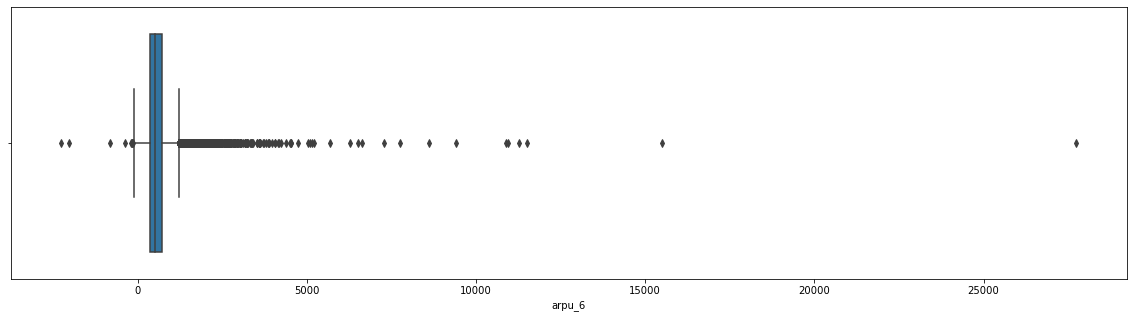

In [40]:
# We see arpu as negative as well. Let's check that.
plt.figure(figsize=[20,5])
sns.boxplot(df.arpu_6)
plt.show()

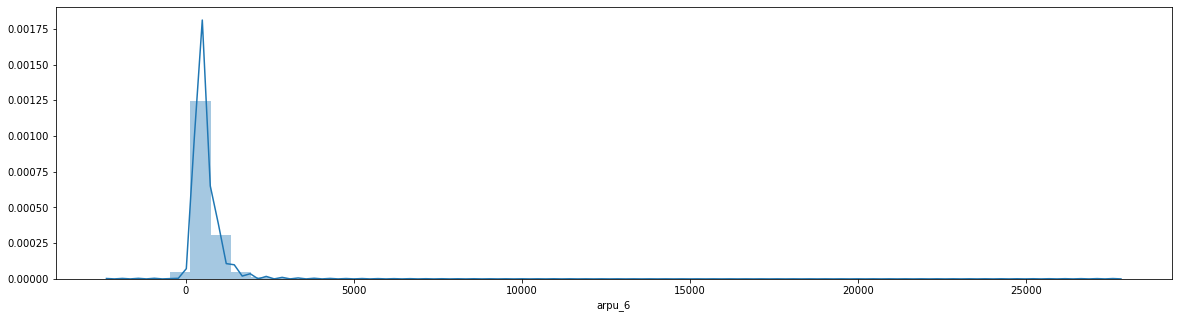

In [41]:
# We see that the boxplot shows a lot of outliers as well.
plt.figure(figsize=[20,5])
sns.distplot(df.arpu_6)

In [42]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.arpu_6.quantile(0.05)
Q3 = df.arpu_6.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.arpu_6 >= Q1 - 1*IQR) & (df.arpu_6 <= Q3 + 1*IQR)]
print(df.shape)

(30011, 139)
-836.9415000000001 2279.661
(29822, 139)


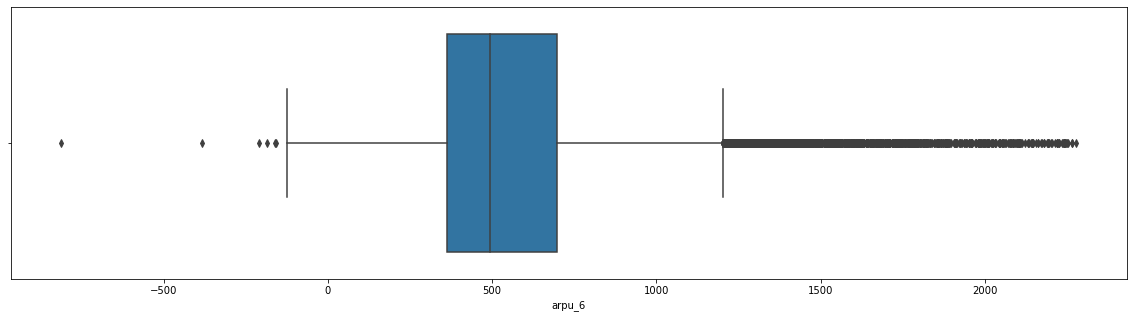

In [43]:
plt.figure(figsize=[20,5])
sns.boxplot(df.arpu_6)
plt.show()

In [44]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_rech_amt_avg,target,daily_avg_3g_good_phase,daily_avg_mou_good_phase,daily_avg_3g_action_phase,avg_mou_action_phase
count,29822.0,29822.0,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.0,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.0,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.0,0.0,0.0,569.276114,576.506470,522.898552,292.586177,302.075763,265.083123,412.197086,420.042784,371.743376,16.941718,13.177699,12.991599,28.182864,21.288170,20.997455,9

In [45]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.arpu_7.quantile(0.05)
Q3 = df.arpu_7.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.arpu_7 >= Q1 - 1*IQR) & (df.arpu_7 <= Q3 + 1*IQR)]
print(df.shape)

(29822, 139)
-801.178999999999 2240.645949999998
(29706, 139)


In [46]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.arpu_8.quantile(0.05)
Q3 = df.arpu_8.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.arpu_8 >= Q1 - 1*IQR) & (df.arpu_8 <= Q3 + 1*IQR)]
print(df.shape)

(29706, 139)
-1166.9035000000001 2401.03775
(29642, 139)


In [47]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.vol_3g_mb_6.quantile(0.05)
Q3 = df.vol_3g_mb_6.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.vol_3g_mb_6 >= Q1 - 1*IQR) & (df.vol_3g_mb_6 <= Q3 + 1*IQR)]
print(df.shape)

(29642, 139)
-1465.2784999999963 2930.5569999999925
(29243, 139)


In [48]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.vol_3g_mb_7.quantile(0.05)
Q3 = df.vol_3g_mb_7.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.vol_3g_mb_7 >= Q1 - 1*IQR) & (df.vol_3g_mb_7 <= Q3 + 1*IQR)]
print(df.shape)

(29243, 139)
-1384.8449999999982 2769.6899999999964
(28954, 139)


In [49]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.vol_3g_mb_8.quantile(0.05)
Q3 = df.vol_3g_mb_8.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.vol_3g_mb_8 >= Q1 - 1*IQR) & (df.vol_3g_mb_8 <= Q3 + 1*IQR)]
print(df.shape)

(28954, 139)
-1246.0959999999993 2492.1919999999986
(28650, 139)


In [50]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_rech_amt_avg,target,daily_avg_3g_good_phase,daily_avg_mou_good_phase,daily_avg_3g_action_phase,avg_mou_action_phase
count,28650.0,28650.0,28650.0,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.0,28650.0,28650.0,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.00000,28650.000000,28650.000000,28650.000000,28650.00000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.0,28650.0,28650.0,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000,28650.000000
mean,0.0,0.0,0.0,557.279744,555.981036,501.695994,297.193990,305.281604,267.275500,414.853063,419.807026,370.086637,16.864063,12.963538,12.667274,27.969281,20.655995,20.002978,94.

In [51]:
# Let's build a correlation matrix to see the relation between the variables

In [52]:
np.abs(pd.DataFrame(df.corr().target).fillna(value=0)).sort_values(by='target',ascending=False)

,target
target,1.000000
arpu_8,0.253701
total_rech_amt_8,0.251209
total_ic_mou_8,0.196648
total_og_mou_8,0.190056
loc_ic_mou_8,0.187937
loc_og_mou_8,0.180796
loc_og_t2m_mou_8,0.179890
avg_mou_action_phase,0.178764
loc_ic_t2m_mou_8,0.174835


In [53]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.total_rech_amt_8.quantile(0.05)
Q3 = df.total_rech_amt_8.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.total_rech_amt_8 >= Q1 - 1*IQR) & (df.total_rech_amt_8 <= Q3 + 1*IQR)]
print(df.shape)

(28650, 139)
-1373.0 2746.0
(28625, 139)


In [54]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.total_ic_mou_8.quantile(0.05)
Q3 = df.total_ic_mou_8.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.total_ic_mou_8 >= Q1 - 1*IQR) & (df.total_ic_mou_8 <= Q3 + 1*IQR)]
print(df.shape)

(28625, 139)
-914.3899999999998 1828.7799999999995
(28386, 139)


In [55]:
#Outlier Treatment
# finding (statistical) outliers
print(df.shape)
Q1 = df.total_og_mou_8.quantile(0.05)
Q3 = df.total_og_mou_8.quantile(0.95)
IQR = Q3 - Q1
print(Q1 - 1*IQR,Q3 + 1*IQR)
df=df[(df.total_og_mou_8 >= Q1 - 1*IQR) & (df.total_og_mou_8 <= Q3 + 1*IQR)]
print(df.shape)

(28386, 139)
-1845.73 3691.46
(28254, 139)


### 7. Feature Standardisation

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df)
df_1=scaler.transform(df)
df_1=pd.DataFrame(df_1)
df_1.columns=df.columns
df_1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_rech_amt_avg,target,daily_avg_3g_good_phase,daily_avg_mou_good_phase,daily_avg_3g_action_phase,avg_mou_action_phase
0,0.0,0.0,0.0,0.287941,0.416029,0.180571,0.067717,0.060428,0.009321,0.017393,0.016281,0.034959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048763,0.037582,0.003423,0.017117,0.015837,0.015122,0.000000,0.000000,0.000000,0.0,0.0,0.020322,0.061445,0.049306,0.017175,0.023598,0.028884,0.006422,0.002575,0.002123,0.020763,0.0,0.0,0.0,0.0,0.0,0.0,0.024157,0.029428,0.026960,0.0,0.0,0.000000,0.000000,0.000000,0.007355,0.000000,0.0,0.0,0.081644,0.072299,0.046480,0.005798,0.002012,0.000180,0.014861,0.004405,0.009018,0.000000,0.000000,0.000000,0.013913,0.004848,0.008708,0.000000,0.000199,0.000069,0.006206,0.001176,0.000394,0.000000,0.0,0.000000,0.0,0.0,0.0,0.006203,0.001343,0.000434,0.015658,0.005545,0.009069,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111765,0.175000,0.101449,0.0874,0.147232,0.043716,0.026866,0.049677,0.013643,0.014925,0.000000,0.004762,0.0,0.045215,0.000003,0.0,0.272028,0.004794,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033292,0.004602,0.243639,0.017894,0.064871,0.0,0.136034,0.077161,0.004794,0.043881
1,0.0,0.0,0.0,0.331049,0.318645,0.351190,0.082133,0.018659,0.141956,0.075941,0.024086,0.123580,0.009004,0.037826,0.017293,0.003685,0.018767,0.000581,0.008145,0.001069,0.009870,0.031953,0.010609,0.088103,0.006711,0.000000,0.025321,0.0,0.0,0.001393,0.033366,0.009150,0.096442,0.090378,0.018612,0.141694,0.048027,0.011194,0.043052,0.0,0.0,0.0,0.0,0.0,0.0,0.130148,0.028495,0.179729,0.0,0.0,0.001943,0.000000,0.000000,0.003437,0.000000,0.0,0.0,0.145680,0.032227,0.275061,0.016508,0.001550,0.030574,0.036877,0.005838,0.113709,0.002866,0.000000,0.006215,0.036835,0.005311,0.140780,0.044432,0.013109,0.106061,0.085261,0.008584,0.192820,0.000000,0.0,0.001590,0.0,0.0,0.0,0.117199,0.019620,0.274517,0.146025,0.033592,0.627532,0.022773,0.0,0.0,0.150783,0.030395,0.218421,0.062107,0.010856,0.017721,0.035294,0.033333,0.079710,0.1014,0.061979,0.261202,0.032836,0.035484,0.059118,0.03283

In [57]:
df_1.shape

(28254, 139)

### Checking the Churn Rate

In [58]:
churn = (sum(df_1['target'])/len(df_1['target'].index))*100
churn

8.763360940043889

#### We have 8.7% churn rate and we will be using a class imbalance technique before creating a model.

### 8. Model Building
Let's start by splitting our data into a training set and a test set.

#### Splitting Data into Training and Test Sets

In [59]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_1.drop(['target'],axis=1)

# Putting response variable to y
y = df_1['target']

y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [60]:
# Splitting the data into train and test into same proportions of target variable as in the original dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

### 9. Part 1 : Creating model using PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [61]:
X_train.shape

(19777, 138)

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(random_state=42)

In [64]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [65]:
pca.components_

array([[-3.31152833e-19,  5.55111512e-16, -0.00000000e+00, ...,
        -1.36609682e-02,  8.38736090e-02, -1.14065032e-02],
       [-1.23782769e-19,  0.00000000e+00,  2.77555756e-17, ...,
        -5.94107992e-02,  2.19552574e-01, -7.99828738e-02],
       [-2.73404876e-20,  1.14491749e-16, -3.81639165e-17, ...,
        -2.67294595e-02, -4.15153943e-02, -4.11060910e-02],
       ...,
       [-0.00000000e+00, -5.86295523e-02,  5.22077779e-03, ...,
        -7.98285422e-03, -5.76659178e-05, -2.00376226e-04],
       [ 9.99999724e-01, -3.23302947e-04, -4.95109011e-04, ...,
         2.60118627e-04, -2.40009108e-05,  2.03360217e-05],
       [ 0.00000000e+00, -7.52623954e-01,  5.90010356e-01, ...,
         5.75022572e-02, -2.70683866e-02, -1.45969961e-01]])

Looking at the explained variance ratio for each component

In [66]:
pca.explained_variance_ratio_

array([1.79907923e-01, 1.48054595e-01, 1.09953977e-01, 8.16550428e-02,
       5.01836975e-02, 4.73692392e-02, 4.36409096e-02, 3.55472913e-02,
       2.70671000e-02, 2.56242821e-02, 2.34481309e-02, 2.30488182e-02,
       2.03463249e-02, 1.83881101e-02, 1.78308107e-02, 1.72635734e-02,
       1.60816657e-02, 1.51652238e-02, 1.24945023e-02, 9.36454794e-03,
       7.75375116e-03, 6.17468020e-03, 5.95901870e-03, 4.83990193e-03,
       4.02078477e-03, 3.76095809e-03, 3.39064660e-03, 3.08513567e-03,
       2.92050398e-03, 2.52309418e-03, 2.28612350e-03, 1.99691847e-03,
       1.96758863e-03, 1.87729274e-03, 1.64725373e-03, 1.43362328e-03,
       1.34620435e-03, 1.26155522e-03, 1.19380310e-03, 1.15163707e-03,
       1.08851852e-03, 9.46152580e-04, 9.03753328e-04, 7.92879741e-04,
       7.40906587e-04, 7.08148533e-04, 6.68037106e-04, 6.08744038e-04,
       5.96673902e-04, 5.59418907e-04, 5.40981891e-04, 5.32129736e-04,
       4.68202868e-04, 4.47342546e-04, 4.10103314e-04, 4.04796159e-04,
      

Making a scree plot for the explained variance

In [67]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

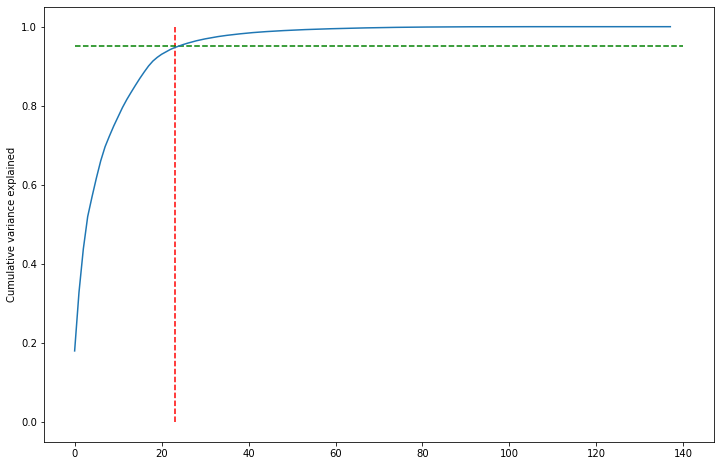

In [70]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=23, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 23 components

In [71]:
from sklearn.decomposition import IncrementalPCA

In [72]:
pca_final = IncrementalPCA(n_components=23)

In [73]:
df_train_pca = pca_final.fit_transform(X_train)

In [74]:
df_train_pca.shape

(19777, 23)

In [75]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [76]:
corrmat.shape

(23, 23)

Plotting the heatmap of the corr matrix

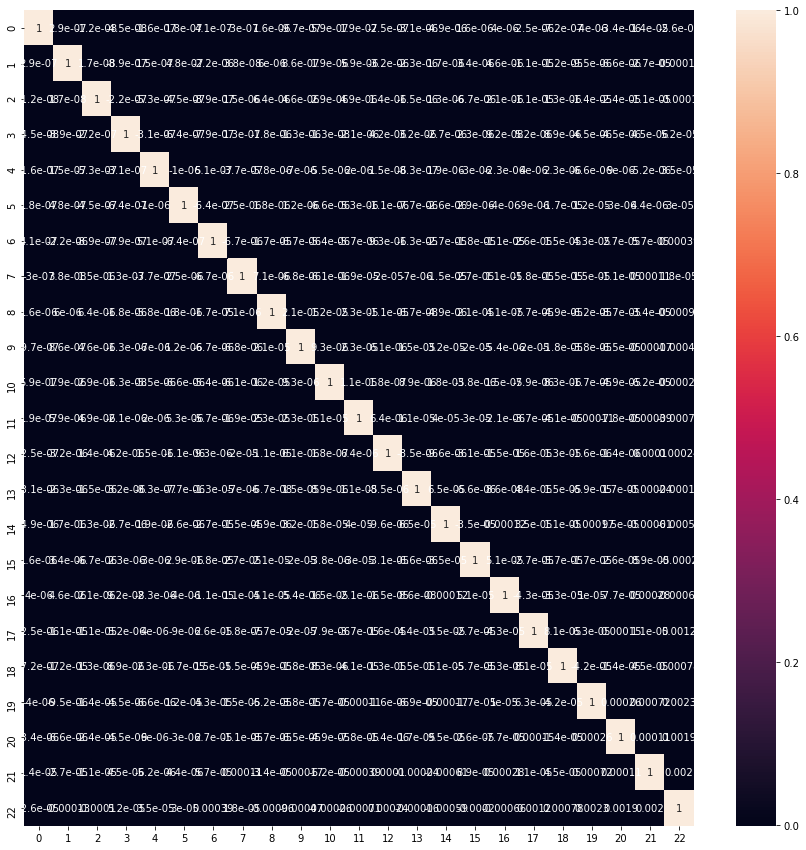

In [77]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [78]:
np.cumsum(pca_final.explained_variance_ratio_)

array([0.17990781, 0.32796208, 0.43791564, 0.51957037, 0.56975365,
       0.61712241, 0.6607625 , 0.69630875, 0.72337392, 0.74899701,
       0.77244407, 0.79549052, 0.81583546, 0.83422148, 0.85204603,
       0.86930697, 0.88538542, 0.90054705, 0.9130368 , 0.92239088,
       0.93013766, 0.93619548, 0.94133505])

In [79]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8477, 23)

### Model 1: Applying logistic regression (also applying class weights to handle class imbalance) on the data on our Principal components

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
learner_pca = LogisticRegression(class_weight='balanced')

In [82]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the original train set before oversampling

In [83]:
y_train_pred=learner_pca.predict_proba(df_train_pca)

In [84]:
y_train_pred=y_train_pred[:,1]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [85]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
19427,0.0,0.164214
27211,1.0,0.832032
27206,0.0,0.095978
8875,0.0,0.322609
26343,0.0,0.395115


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
19427,0.0,0.164214,0
27211,1.0,0.832032,1
27206,0.0,0.095978,0
8875,0.0,0.322609,0
26343,0.0,0.395115,0


In [87]:
from sklearn import metrics

In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14410  3634]
 [  317  1416]]


In [89]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14410,  3634],
       [  317,  1416]])

In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8002224806593518

#### Metrics beyond simply accuracy

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170802077322562

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7986034138771891

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20139658612281092


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.2803960396039604


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9784749100291981


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

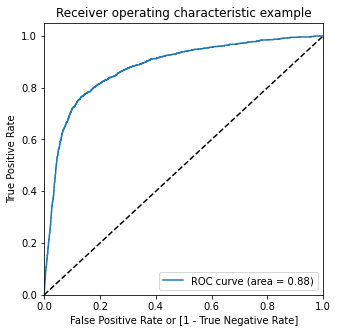

In [99]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
19427,0.0,0.164214,0,1,1,0,0,0,0,0,0,0,0
27211,1.0,0.832032,1,1,1,1,1,1,1,1,1,1,0
27206,0.0,0.095978,0,1,0,0,0,0,0,0,0,0,0
8875,0.0,0.322609,0,1,1,1,1,0,0,0,0,0,0
26343,0.0,0.395115,0,1,1,1,1,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087627  1.000000  0.000000
0.1   0.1  0.357739  0.970571  0.298881
0.2   0.2  0.509734  0.946336  0.467801
0.3   0.3  0.625980  0.912868  0.598426
0.4   0.4  0.721191  0.871898  0.706717
0.5   0.5  0.800222  0.817080  0.798603
0.6   0.6  0.859332  0.762262  0.868654
0.7   0.7  0.895282  0.668782  0.917036
0.8   0.8  0.916721  0.498557  0.956883
0.9   0.9  0.915558  0.184074  0.985812


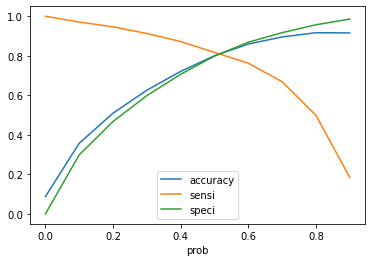

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
19427,0.0,0.164214,0,1,1,0,0,0,0,0,0,0,0,0
27211,1.0,0.832032,1,1,1,1,1,1,1,1,1,1,0,1
27206,0.0,0.095978,0,1,0,0,0,0,0,0,0,0,0,0
8875,0.0,0.322609,0,1,1,1,1,0,0,0,0,0,0,0
26343,0.0,0.395115,0,1,1,1,1,0,0,0,0,0,0,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8002224806593518

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14410,  3634],
       [  317,  1416]])

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170802077322562

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.7986034138771891

In [109]:
# Calculate false postive rate - predicting churn when customer has not churned
print(FP/ float(TN+FP))

0.20139658612281092


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2803960396039604


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9784749100291981


#### Making predictions on the test set

In [112]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [113]:
pred_probs_test = pd.DataFrame(pred_probs_test[:,1])

In [114]:
pred_probs_test.head()

,0
0,0.126240
1,0.142734
2,0.023170
3,0.129726
4,0.381443


In [115]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.58 else 0
pred_probs_test = pred_probs_test[0].map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
pred_probs_test.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [116]:
from sklearn import metrics

In [117]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pred_probs_test)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[6121 1613]
 [ 116  627]]


In [118]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,1]+cm1[0,0])
print('Specificity : ', specificity1)

Accuracy :  0.7960363336085879
Sensitivity :  0.8438761776581427
Specificity :  0.7914403930695629


In [339]:
metrics.roc_auc_score(y_test,pred_probs_test)

0.8144901939696804

#### It is giving a similar result to what it was giving on the train data set.
#### Sensitivity is the most important metric for us and we are able to reach 84% at an optimum cut-off
#### Let's try to build another model, this time a decision tree with hyperparamter tuning

### Model 2: Decision Tree with hyperparameter tuning using K-fold cross validation on the imbalanced dataset

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dt = DecisionTreeClassifier()

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
weights = np.linspace(0.0,0.99,10)

In [141]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [ 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50],
    'min_samples_split': [5, 10, 20, 50],
    'criterion': ["gini"],
    'class_weight': [{0:x, 1:1.0-x} for x in weights]
}

In [155]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "f1")

In [156]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
CPU times: user 4.38 s, sys: 639 ms, total: 5.02 s
Wall time: 2min 56s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.11, 1: 0.89},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.33, 1: 0.6699999999999999},
                                          {0: 0.44, 1: 0.56},
                                          {0: 0.55, 1: 0.44999999999999996},
                                          {0: 0.66, 1: 0.33999999999999997},
                                          {0: 0.77, 1: 0.22999999999999998},
                                          {0: 0.88, 1: 0.12},
                                          {0: 0.99, 1: 0.010000000000000009}],
                         'criterion': ['gini'], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [5, 10, 20, 50]},
             scoring='f1', verbose=1)

In [157]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016313,0.002284,0.010648,0.003877,"{0: 0.0, 1: 1.0}",gini,5,5,5,"{'class_weight': {0: 0.0, 1: 1.0}, 'criterion'...",0.161205,0.160971,0.161227,0.161134,0.000116,327
1,0.020068,0.001845,0.009938,0.001614,"{0: 0.0, 1: 1.0}",gini,5,5,10,"{'class_weight': {0: 0.0, 1: 1.0}, 'criterion'...",0.161205,0.160971,0.161227,0.161134,0.000116,327
2,0.017774,0.000785,0.019577,0.003432,"{0: 0.0, 1: 1.0}",gini,5,5,20,"{'class_weight': {0: 0.0, 1: 1.0}, 'criterion'...",0.161205,0.160971,0.161227,0.161134,0.000116,327
3,0.023854,0.007566,0.015383,0.009947,"{0: 0.0, 1: 1.0}",gini,5,5,50,"{'class_weight': {0: 0.0, 1: 1.0}, 'criterion'...",0.161205,0.160971,0.161227,0.161134,0.000116,327
4,0.024339,0.011103,0.009880,0.001609,"{0: 0.0, 1: 1.0}",gini,5,10,5,"{'class_weight': {0: 0.0, 1: 1.0}, 'criterion'...",0.161205,0.160971,0.161227,0.161134,0.000116,327


In [158]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
172,0.496900,0.003648,0.008729,0.000079,"{0: 0.33, 1: 0.6699999999999999}",gini,10,50,5,"{'class_weight': {0: 0.33, 1: 0.66999999999999...",0.469595,0.457193,0.477291,0.468026,0.008280,1
190,0.562145,0.022247,0.008839,0.000110,"{0: 0.33, 1: 0.6699999999999999}",gini,20,50,20,"{'class_weight': {0: 0.33, 1: 0.66999999999999...",0.469595,0.457193,0.477291,0.468026,0.008280,1
188,0.555286,0.020913,0.008885,0.000062,"{0: 0.33, 1: 0.6699999999999999}",gini,20,50,5,"{'class_weight': {0: 0.33, 1: 0.66999999999999...",0.464407,0.457193,0.477291,0.466297,0.008313,3
189,0.560692,0.016185,0.009027,0.000056,"{0: 0.33, 1: 0.6699999999999999}",gini,20,50,10,"{'class_weight': {0: 0.33, 1: 0.66999999999999...",0.464407,0.457193,0.477291,0.466297,0.008313,3
191,0.555529,0.023634,0.008908,0.000378,"{0: 0.33, 1: 0.6699999999999999}",gini,20,50,50,"{'class_weight': {0: 0.33, 1: 0.66999999999999...",0.464407,0.457193,0.477291,0.466297,0.008313,3


In [159]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.6699999999999999},
                       max_depth=10, min_samples_leaf=50, min_samples_split=5)

In [160]:
dt_best = grid_search.best_estimator_

In [161]:
dt_best.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.6699999999999999},
                       max_depth=10, min_samples_leaf=50, min_samples_split=5)

In [162]:
y_train_pred = dt_best.predict(df_train_pca)
y_test_pred = dt_best.predict(df_test_pca)

In [163]:
confusion2=confusion_matrix(y_train,y_train_pred)
confusion2

array([[17315,   729],
       [  814,   919]])

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.9219800778682308

In [166]:
# Sensitivity
TP / float(TP+FN)

0.5302942873629544

In [167]:
# Specificity
TN / float(TN+FP)

0.959598758590113

In [168]:
cm1=confusion_matrix(y_test,y_test_pred)
cm1

array([[7360,  374],
       [ 398,  345]])

In [169]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Accuracy :  0.908930046006842
Sensitivity :  0.46433378196500674
Specificity :  0.9516420998189811


In [170]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [171]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=pd.DataFrame(df_test_pca).columns, 
                    class_names=['Churn', "Not Churned"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [172]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(y_test, dt_best.predict(df_test_pca)))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      7734
         1.0       0.48      0.46      0.47       743

    accuracy                           0.91      8477
   macro avg       0.71      0.71      0.71      8477
weighted avg       0.91      0.91      0.91      8477



#### The decision tree is not able to perform well on even the best parameters as the sensitivity is still at 54%.

### Model 3: Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", metrics.accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", metrics.accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

#### Grid search for hyper-parameter tuning

In [176]:
classifier_rf = RandomForestClassifier( n_jobs=-1,class_weight='balanced')

In [193]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [ 5,10,20],
    'max_features': [3,4,5],
    'n_estimators': [50,100]
}

In [195]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, verbose=1,n_jobs=-1, scoring = "roc_auc")

In [196]:
%%time
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: user 12.6 s, sys: 205 ms, total: 12.9 s
Wall time: 3min 47s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=1)

In [197]:
rf_best = grid_search.best_estimator_

In [198]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=5,
                       min_samples_leaf=10, n_jobs=-1)

In [199]:
evaluate_model(rf_best)

Train Accuracy : 0.944228143803408
Train Confusion Matrix:
[[17109   935]
 [  168  1565]]
--------------------------------------------------
Test Accuracy : 0.9066886870355079
Test Confusion Matrix:
[[7247  487]
 [ 304  439]]


In [200]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.674774,0.029710,0.037002,0.000848,5,3,5,50,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.862468,0.862370,0.868651,0.864496,0.002938,43
1,3.716506,0.083593,0.066142,0.003782,5,3,5,100,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.859391,0.864373,0.865755,0.863173,0.002733,52
2,1.673059,0.119521,0.042470,0.004335,5,3,10,50,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.857437,0.859029,0.866205,0.860891,0.003814,54
3,3.964215,0.061438,0.092242,0.010536,5,3,10,100,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.859704,0.865156,0.867652,0.864171,0.003319,46
4,1.910258,0.079345,0.041453,0.004775,5,3,20,50,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.861073,0.864632,0.865730,0.863812,0.001987,49


In [201]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
51,9.514158,0.136102,0.100196,0.018497,15,5,10,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.865297,0.879548,0.878448,0.874431,0.006474,1
35,9.393474,0.061097,0.091801,0.012278,10,5,20,100,"{'max_depth': 10, 'max_features': 5, 'min_samp...",0.866270,0.876133,0.877009,0.873137,0.004869,2
23,7.324562,0.224096,0.076676,0.009063,10,3,20,100,"{'max_depth': 10, 'max_features': 3, 'min_samp...",0.863828,0.878533,0.876680,0.873014,0.006539,3
53,7.741991,0.074463,0.077052,0.019351,15,5,20,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.864087,0.876191,0.877590,0.872623,0.006063,4
29,8.804824,0.094102,0.078288,0.007365,10,4,20,100,"{'max_depth': 10, 'max_features': 4, 'min_samp...",0.865860,0.875732,0.875682,0.872425,0.004642,5


In [202]:
y_train_pred = rf_best.predict(df_train_pca)
y_test_pred = rf_best.predict(df_test_pca)

In [203]:
confusion2=confusion_matrix(y_train,y_train_pred)
confusion2

array([[17109,   935],
       [  168,  1565]])

In [204]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [205]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.944228143803408

In [206]:
# Sensitivity
TP / float(TP+FN)

0.9030582804385459

In [207]:
# Specificity
TN / float(TN+FP)

0.9481822212369763

In [208]:
cm1=confusion_matrix(y_test,y_test_pred)
cm1

array([[7247,  487],
       [ 304,  439]])

In [209]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Accuracy :  0.9066886870355079
Sensitivity :  0.5908479138627187
Specificity :  0.9370312904059995


#### Only able to achieve 60% sensitivity on test dataset with random forest using weighted classes

### Model 4: Regularized Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [226]:
learner_pca = LogisticRegression(solver='newton-cg',class_weight='balanced',penalty='l2')

In [227]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the original train set before oversampling

In [228]:
y_train_pred=learner_pca.predict_proba(df_train_pca)

In [229]:
y_train_pred=y_train_pred[:,1]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [230]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
19427,0.0,0.164223
27211,1.0,0.832034
27206,0.0,0.095986
8875,0.0,0.322605
26343,0.0,0.395137


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [231]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
19427,0.0,0.164223,0
27211,1.0,0.832034,1
27206,0.0,0.095986,0
8875,0.0,0.322605,0
26343,0.0,0.395137,0


In [232]:
from sklearn import metrics

In [233]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14410  3634]
 [  317  1416]]


In [234]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14410,  3634],
       [  317,  1416]])

In [235]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8002224806593518

#### Metrics beyond simply accuracy

In [236]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170802077322562

In [238]:
# Let us calculate specificity
TN / float(TN+FP)

0.7986034138771891

In [239]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20139658612281092


In [240]:
# positive predictive value 
print (TP / float(TP+FP))

0.2803960396039604


In [241]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9784749100291981


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [242]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [243]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

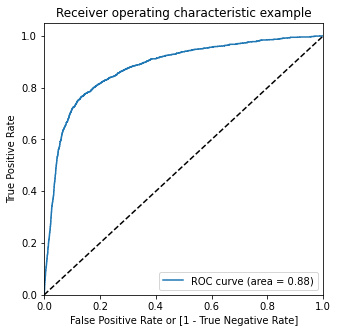

In [244]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [245]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
19427,0.0,0.164223,0,1,1,0,0,0,0,0,0,0,0
27211,1.0,0.832034,1,1,1,1,1,1,1,1,1,1,0
27206,0.0,0.095986,0,1,0,0,0,0,0,0,0,0,0
8875,0.0,0.322605,0,1,1,1,1,0,0,0,0,0,0
26343,0.0,0.395137,0,1,1,1,1,0,0,0,0,0,0


In [246]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087627  1.000000  0.000000
0.1   0.1  0.357739  0.970571  0.298881
0.2   0.2  0.509734  0.946336  0.467801
0.3   0.3  0.625980  0.912868  0.598426
0.4   0.4  0.721191  0.871898  0.706717
0.5   0.5  0.800222  0.817080  0.798603
0.6   0.6  0.859332  0.762262  0.868654
0.7   0.7  0.895282  0.668782  0.917036
0.8   0.8  0.916721  0.498557  0.956883
0.9   0.9  0.915558  0.184074  0.985812


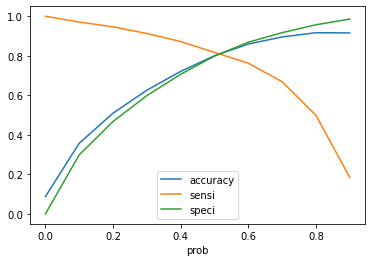

In [247]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [248]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
19427,0.0,0.164223,0,1,1,0,0,0,0,0,0,0,0,0
27211,1.0,0.832034,1,1,1,1,1,1,1,1,1,1,0,1
27206,0.0,0.095986,0,1,0,0,0,0,0,0,0,0,0,0
8875,0.0,0.322605,0,1,1,1,1,0,0,0,0,0,0,0
26343,0.0,0.395137,0,1,1,1,1,0,0,0,0,0,0,0


In [249]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8002224806593518

In [250]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14410,  3634],
       [  317,  1416]])

In [251]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [252]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170802077322562

In [253]:
# Let us calculate specificity
TN / float(TN+FP)

0.7986034138771891

In [254]:
# Calculate false postive rate - predicting churn when customer has not churned
print(FP/ float(TN+FP))

0.20139658612281092


In [255]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2803960396039604


In [256]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9784749100291981


#### Making predictions on the test set

In [257]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [258]:
pred_probs_test = pd.DataFrame(pred_probs_test[:,1])

In [259]:
pred_probs_test.head()

,0
0,0.126241
1,0.142746
2,0.023165
3,0.129740
4,0.381451


In [260]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.58 else 0
pred_probs_test = pred_probs_test[0].map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
pred_probs_test.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [261]:
from sklearn import metrics

In [262]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pred_probs_test)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[6121 1613]
 [ 116  627]]


In [263]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,1]+cm1[0,0])
print('Specificity : ', specificity1)

Accuracy :  0.7960363336085879
Sensitivity :  0.8438761776581427
Specificity :  0.7914403930695629


#### It is giving a similar result to what it was giving on the train data set.
#### Sensitivity is the most important metric for us and we are able to reach 84% at an optimum cut-off

### Model 5: XG Boost Classifier

In [277]:
import xgboost as xgb

xgclf = xgb.XGBClassifier()

In [278]:
xgclf.fit(df_train_pca, y_train)

/Users/Anagh/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [279]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(df_train_pca)[:, 1]))

AUC on train data by XGBoost = 0.9983856222201215


In [280]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(df_test_pca)[:, 1]))

AUC on test data by XGBoost = 0.8755094092575442


In [282]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

/Users/Anagh/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [283]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.8630601953352727
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [289]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [4, 6, 8],
              'min_child_weight': [1,3,7],
              'n_estimators': [50, 100, 150]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

/Users/Anagh/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [292]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 50}
0.8801729483521474
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [296]:
final_model = xgb.XGBClassifier(learning_rate=0.2,
                                max_depth=4,
                                min_child_weight=7,
                                n_estimators=50)

final_model.fit(df_train_pca, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(df_test_pca)[:, 1]))

/Users/Anagh/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.928862165869338
AUC on test data by XGBoost = 0.894916992699033


In [299]:
y_train_pred=final_model.predict_proba(df_train_pca)

In [300]:
y_train_pred=y_train_pred[:,1]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [301]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
19427,0.0,0.006740
27211,1.0,0.650914
27206,0.0,0.010256
8875,0.0,0.013217
26343,0.0,0.053342


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [302]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
19427,0.0,0.006740,0
27211,1.0,0.650914,1
27206,0.0,0.010256,0
8875,0.0,0.013217,0
26343,0.0,0.053342,0


In [303]:
from sklearn import metrics

In [304]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[17763   281]
 [  936   797]]


In [305]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[17763,   281],
       [  936,   797]])

In [306]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9384638721747485

#### Metrics beyond simply accuracy

In [307]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [308]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4598961338718984

In [309]:
# Let us calculate specificity
TN / float(TN+FP)

0.9844269563289736

In [310]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01557304367102638


In [311]:
# positive predictive value 
print (TP / float(TP+FP))

0.7393320964749536


In [312]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9499438472645596


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [313]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [314]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

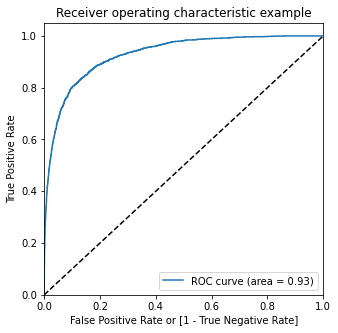

In [315]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [316]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
19427,0.0,0.006740,0,1,0,0,0,0,0,0,0,0,0
27211,1.0,0.650914,1,1,1,1,1,1,1,1,0,0,0
27206,0.0,0.010256,0,1,0,0,0,0,0,0,0,0,0
8875,0.0,0.013217,0,1,0,0,0,0,0,0,0,0,0
26343,0.0,0.053342,0,1,0,0,0,0,0,0,0,0,0


In [317]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087627  1.000000  0.000000
0.1   0.1  0.874804  0.821119  0.879960
0.2   0.2  0.919654  0.718407  0.938982
0.3   0.3  0.931840  0.631275  0.960707
0.4   0.4  0.937099  0.549913  0.974285
0.5   0.5  0.938464  0.459896  0.984427
0.6   0.6  0.935784  0.337565  0.993239
0.7   0.7  0.926278  0.172533  0.998670
0.8   0.8  0.914749  0.027698  0.999945
0.9   0.9  0.912575  0.002308  1.000000


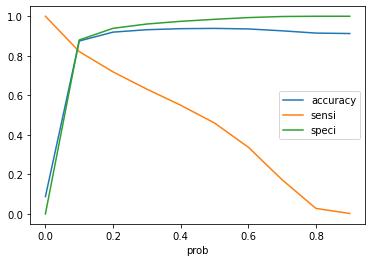

In [318]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [319]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
19427,0.0,0.006740,0,1,0,0,0,0,0,0,0,0,0,0
27211,1.0,0.650914,1,1,1,1,1,1,1,1,0,0,0,1
27206,0.0,0.010256,0,1,0,0,0,0,0,0,0,0,0,0
8875,0.0,0.013217,0,1,0,0,0,0,0,0,0,0,0,0
26343,0.0,0.053342,0,1,0,0,0,0,0,0,0,0,0,0


In [320]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8748040653284118

In [321]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15878,  2166],
       [  310,  1423]])

In [322]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [323]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8211194460473168

In [324]:
# Let us calculate specificity
TN / float(TN+FP)

0.8799600975393482

In [325]:
# Calculate false postive rate - predicting churn when customer has not churned
print(FP/ float(TN+FP))

0.12003990246065174


In [326]:
# Positive predictive value 
print (TP / float(TP+FP))

0.39648927277793256


In [327]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9808500123548307


#### Making predictions on the test set

In [332]:
pred_probs_test = final_model.predict_proba(df_test_pca)

In [333]:
pred_probs_test = pd.DataFrame(pred_probs_test[:,1])

In [334]:
pred_probs_test.head()

,0
0,0.023996
1,0.016461
2,0.006514
3,0.007428
4,0.033526


In [335]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.58 else 0
pred_probs_test = pred_probs_test[0].map( lambda x: 1 if x > 0.1 else 0)
# Let's see the head
pred_probs_test.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [336]:
from sklearn import metrics

In [337]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pred_probs_test)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[6759  975]
 [ 182  561]]


In [338]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,1]+cm1[0,0])
print('Specificity : ', specificity1)

Accuracy :  0.8635130352719123
Sensitivity :  0.7550471063257066
Specificity :  0.873933281613654


#### It is giving a similar result to what it was giving on the train data set.
#### Sensitivity is the most important metric for us and we are able to reach 76% at an optimum cut-off

### We can see that XG Boost has performed the best overall, with 0.92 as the ROC-AUC score on train data and 0.89 on the test data.
### The sensitivity was also almost 75% on the test data, which is pretty decent.

## 9. Part 2 : Creating an interpretable model

### Building Logistic Regression with class weights to handle imbalanced data 

In [342]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_rech_amt_avg,daily_avg_3g_good_phase,daily_avg_mou_good_phase,daily_avg_3g_action_phase,avg_mou_action_phase
19427,0.0,0.0,0.0,0.403096,0.426483,0.406236,0.004197,0.006066,0.055888,0.071210,0.085148,0.086867,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.002723,0.006087,0.057650,0.076490,0.093665,0.085141,0.006623,0.003318,0.006473,0.002421,0.001246,0.009124,0.062220,0.078055,0.136470,0.001832,0.000000,0.000000,0.000359,0.000000,0.001166,0.000000,0.000000,0.012865,0.0,0.0,0.0,0.002033,0.000000,0.002990,0.0,0.0,0.0,0.023871,0.000631,0.028694,0.000000,0.0,0.0,0.066362,0.076532,0.149478,0.006221,0.006367,0.024184,0.035161,0.030392,0.117134,0.013203,0.007519,0.017476,0.031436,0.028994,0.145451,0.000000,0.000000,0.000000,0.000288,0.001017,0.001189,0.000586,0.0,0.000258,0.0,0.0,0.0,0.000445,0.001017,0.001319,0.035811,0.028537,0.145850,0.0,0.0,0.0,0.031929,0.000269,0.0,0.0,0.0,0.000000,0.047059,0.058333,0.043478,0.1472,0.150906,0.288525,0.038209,0.041290,0.065484,0.035821,0.054570,0.061905,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622688,0.000125,0.0,0.001936,0.132543,0.0,0.071424,0.000000,0.140538
27211,0.0,0.0,0.0,0.263493,0.361238,0.257156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.011765,0.008333,0.007246,0.1100,0.134738,0.000000,0.164179,0.177419,0.000000,0.000000,0.250114,0.000000,0.0,0

### RFE
Recursive feature elimination

In [343]:
# Importing RFE 
from sklearn.feature_selection import RFE

In [346]:
# Running RFE with the output number of the variable equal to 15
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

/Users/Anagh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [347]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 124),
 ('std_og_t2o_mou', False, 123),
 ('loc_ic_t2o_mou', False, 122),
 ('arpu_6', True, 1),
 ('arpu_7', False, 2),
 ('arpu_8', False, 5),
 ('onnet_mou_6', False, 36),
 ('onnet_mou_7', False, 113),
 ('onnet_mou_8', False, 97),
 ('offnet_mou_6', False, 64),
 ('offnet_mou_7', False, 35),
 ('offnet_mou_8', False, 16),
 ('roam_ic_mou_6', False, 14),
 ('roam_ic_mou_7', False, 27),
 ('roam_ic_mou_8', False, 66),
 ('roam_og_mou_6', False, 47),
 ('roam_og_mou_7', False, 9),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 13),
 ('loc_og_t2t_mou_7', False, 49),
 ('loc_og_t2t_mou_8', False, 29),
 ('loc_og_t2m_mou_6', False, 7),
 ('loc_og_t2m_mou_7', False, 32),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 41),
 ('loc_og_t2f_mou_7', False, 55),
 ('loc_og_t2f_mou_8', False, 62),
 ('loc_og_t2c_mou_6', False, 70),
 ('loc_og_t2c_mou_7', False, 44),
 ('loc_og_t2c_mou_8', False, 82),
 ('loc_og_mou_6', False, 74),
 ('loc_og_mou_7', False, 86),
 ('loc_

In [348]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8'],
      dtype='object')

In [349]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'good_phase_rech_amt_avg', 'daily_avg_3g_good_phase',
       'daily_avg_mou_good_phase', 'daily_avg_3g_action_phase',
       'avg_mou_action_phase'],
      dtype='object', length=123)

In [350]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [383]:
X_test_rfe = X_test[col]

In [351]:
from sklearn.linear_model import LogisticRegression

In [352]:
lt = LogisticRegression(class_weight='balanced')

In [353]:
model_pca = lt.fit(X_train_rfe, y_train)

In [354]:
y_train_pred=lt.predict_proba(X_train_rfe)

In [355]:
y_train_pred=y_train_pred[:,1]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [356]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
19427,0.0,0.157994
27211,1.0,0.784858
27206,0.0,0.177365
8875,0.0,0.334509
26343,0.0,0.367865


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [357]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
19427,0.0,0.157994,0
27211,1.0,0.784858,1
27206,0.0,0.177365,0
8875,0.0,0.334509,0
26343,0.0,0.367865,0


In [358]:
from sklearn import metrics

In [359]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14404  3640]
 [  282  1451]]


In [360]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14404,  3640],
       [  282,  1451]])

In [361]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8016888304596248

#### Metrics beyond simply accuracy

In [362]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [363]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8372763993075591

In [364]:
# Let us calculate specificity
TN / float(TN+FP)

0.7982708933717579

In [365]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2017291066282421


In [366]:
# positive predictive value 
print (TP / float(TP+FP))

0.28501276762914945


In [367]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9807980389486586


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [368]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [369]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

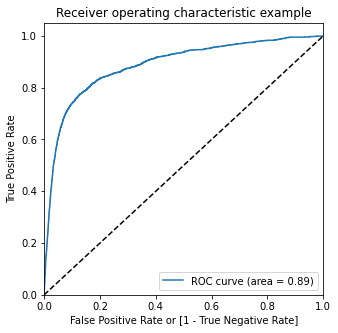

In [370]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [371]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
19427,0.0,0.157994,0,1,1,0,0,0,0,0,0,0,0
27211,1.0,0.784858,1,1,1,1,1,1,1,1,1,0,0
27206,0.0,0.177365,0,1,1,0,0,0,0,0,0,0,0
8875,0.0,0.334509,0,1,1,1,1,0,0,0,0,0,0
26343,0.0,0.367865,0,1,1,1,1,0,0,0,0,0,0


In [372]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087627  1.000000  0.000000
0.1   0.1  0.362239  0.969994  0.303868
0.2   0.2  0.503261  0.946336  0.460707
0.3   0.3  0.617586  0.919792  0.588561
0.4   0.4  0.714112  0.875361  0.698626
0.5   0.5  0.801689  0.837276  0.798271
0.6   0.6  0.865854  0.771495  0.874917
0.7   0.7  0.905243  0.697057  0.925238
0.8   0.8  0.924205  0.534911  0.961594
0.9   0.9  0.918693  0.126370  0.994791


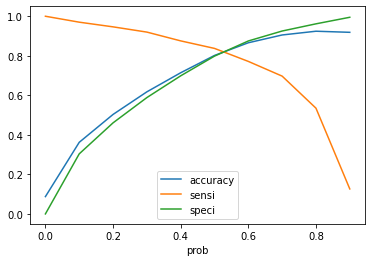

In [373]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [374]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
19427,0.0,0.157994,0,1,1,0,0,0,0,0,0,0,0,0
27211,1.0,0.784858,1,1,1,1,1,1,1,1,1,0,0,1
27206,0.0,0.177365,0,1,1,0,0,0,0,0,0,0,0,0
8875,0.0,0.334509,0,1,1,1,1,0,0,0,0,0,0,0
26343,0.0,0.367865,0,1,1,1,1,0,0,0,0,0,0,0


In [375]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8016888304596248

In [376]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14404,  3640],
       [  282,  1451]])

In [377]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [378]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8372763993075591

In [379]:
# Let us calculate specificity
TN / float(TN+FP)

0.7982708933717579

In [380]:
# Calculate false postive rate - predicting churn when customer has not churned
print(FP/ float(TN+FP))

0.2017291066282421


In [381]:
# Positive predictive value 
print (TP / float(TP+FP))

0.28501276762914945


In [382]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9807980389486586


#### Making predictions on the test set

In [384]:
pred_probs_test = lt.predict_proba(X_test_rfe)

In [385]:
pred_probs_test = pd.DataFrame(pred_probs_test[:,1])

In [386]:
pred_probs_test.head()

,0
0,0.150081
1,0.321634
2,0.015120
3,0.132336
4,0.332359


In [387]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
pred_probs_test = pred_probs_test[0].map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
pred_probs_test.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [388]:
from sklearn import metrics

In [389]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pred_probs_test)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[6125 1609]
 [ 108  635]]


In [390]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,1]+cm1[0,0])
print('Specificity : ', specificity1)

Accuracy :  0.797451928748378
Sensitivity :  0.8546433378196501
Specificity :  0.7919575898629428


In [391]:
metrics.roc_auc_score(y_test,pred_probs_test)

0.8233004638412964

#### It is giving a similar result to what it was giving on the train data set.
#### Sensitivity is the most important metric for us and we are able to reach 85% at an optimum cut-off

In [404]:
impo=[x for x in (lt.coef_.tolist())[0]]

In [397]:
X_train_rfe.columns

Index(['arpu_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8'],
      dtype='object')

In [409]:
np.abs(impo)

array([3.0743623 , 4.3500704 , 4.21552136, 4.42680831, 1.95004503,
       1.2052873 , 4.11196106, 7.20979744, 4.54361352, 3.88789637,
       3.77121454, 1.44644435, 6.33100103, 6.39637192, 4.32669958])

In [410]:
Feature_importance=pd.DataFrame({'Features':list(X_train_rfe.columns),'Coefficients':impo,'Absolute Values':np.abs(impo)})

### Summary of features and their importance in descending order

In [415]:
Feature_importance.sort_values(by='Absolute Values',ascending=False)

,Features,Coefficients,Absolute Values
7,total_ic_mou_7,7.209797,7.209797
13,vol_2g_mb_8,-6.396372,6.396372
12,last_day_rch_amt_8,-6.331001,6.331001
8,total_ic_mou_8,-4.543614,4.543614
3,loc_og_mou_8,-4.426808,4.426808
1,roam_og_mou_8,4.350070,4.350070
14,vol_3g_mb_8,-4.326700,4.326700
2,loc_og_t2m_mou_8,-4.215521,4.215521
6,loc_ic_mou_8,-4.111961,4.111961
9,spl_ic_mou_8,-3.887896,3.887896


## Customer Churn can be managed by:
- Keeping a check on the incoming calls minutes of usage during month 7 or first month of the good phase. The more the minutes of usage, the higher the probability of churn. It is the opposite in month 8 where if the incoming calls are lower than the usual, it can be a cause of concern.
- We can see that local and roaming outgoing calls become very less in the last month as they are about to leave the network.
- We should also keep a check on their internet usage. If it becomes unusually less in the last 2 months, it is definitely a cause of concern as seen above.